In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Check if there are any null values

In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


#### Convert the date column into pandas data time frame

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Find the the Average Price distribution of the data set

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


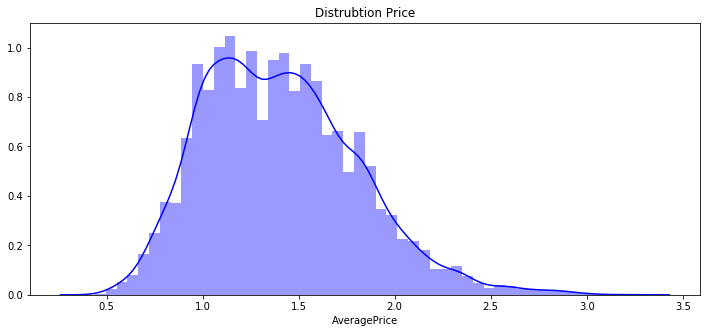

In [11]:
pl.figure(figsize=(12,5))
pl.title("Distrubtion Price")
ax = sns.distplot(df["AveragePrice"], color = 'b')

##### Boxplot to show the difference between conventional and organic average prices

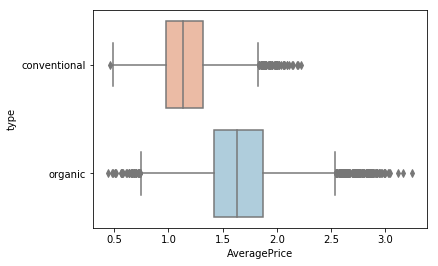

In [8]:
sns.boxplot(x="AveragePrice", y="type", palette = 'RdBu', data=df)

### Comparison between regions and their average average price, sorted by year

In [54]:
order = (df[mask & (df['year']==2018)].groupby('region')['AveragePrice'].mean().sort_values().index)

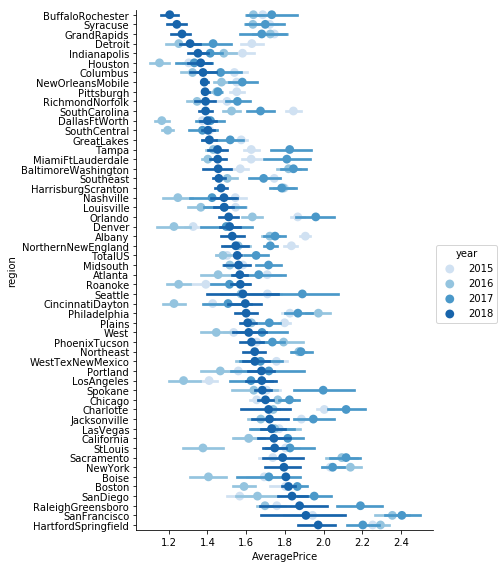

In [55]:
mask = df['type'] == 'organic'
g = sns.factorplot('AveragePrice','region', data = df[mask],size = 8, aspect=0.8,hue='year',palette='Blues', order = order, join=False)

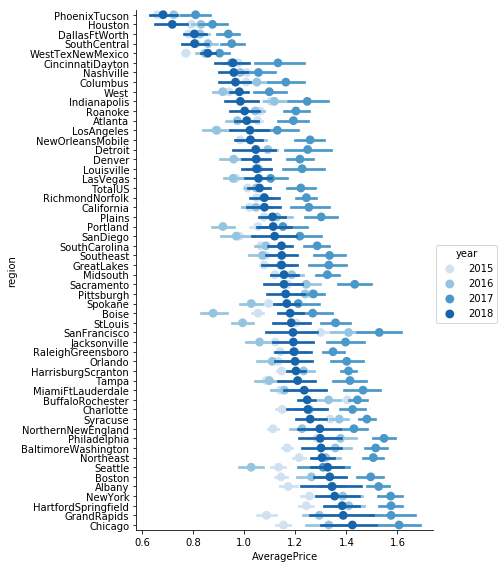

In [47]:
mask = df['type'] == 'conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],size = 8,aspect=0.8,hue='year',palette='Blues',order = order, join=False)

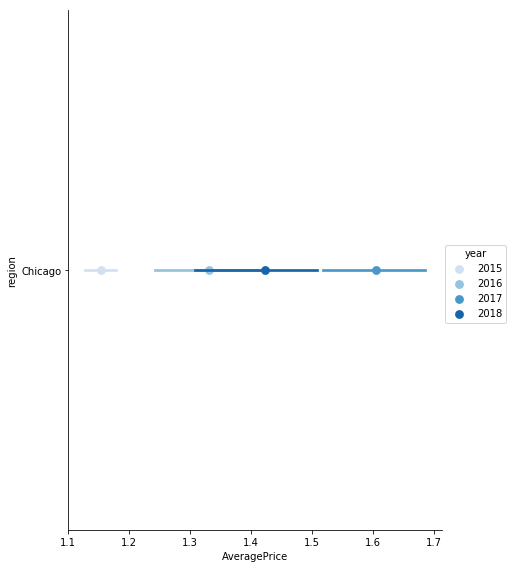

In [58]:
mask = ((df['region'] == 'Chicago') & (df['type'] == 'conventional'))
g = sns.factorplot('AveragePrice','r',data=df[mask],size = 8,aspect=0.8,hue='year',palette='Blues', join=False)

Text(0.5,1,'Average Price of Avocado According to Region')

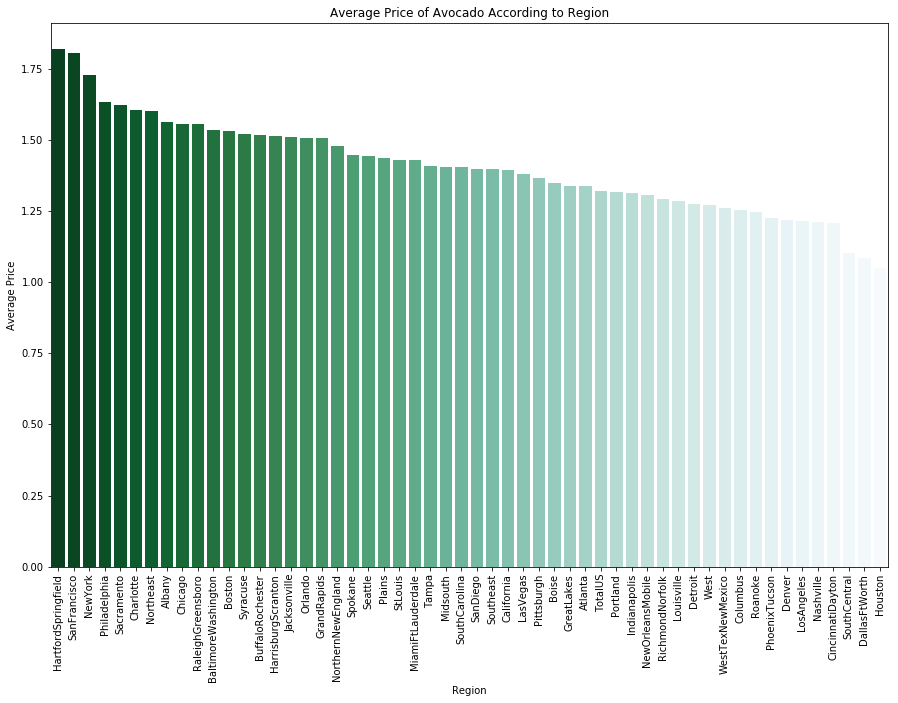

In [67]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

pl.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='BuGn_r')

pl.xticks(rotation=90)
pl.xlabel('Region')
pl.ylabel('Average Price')
pl.title('Average Price of Avocado According to Region')

In [23]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import statsmodels.api as sm

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [28]:
timeSeriesDetailed = pd.read_csv('timeSeriesDay.csv',
                             index_col=[0],
                             names=['Prices'],
                             parse_dates=True)
timeSeriesDetailed.head()

,Prices
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


Text(0,0.5,'Price in Dollars')

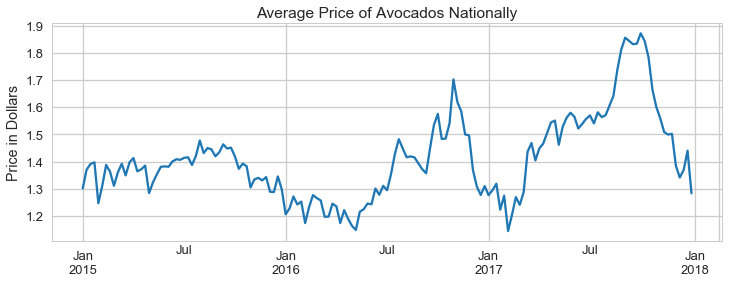

In [38]:
timeSeriesDetailed.Prices.plot(figsize=(12,4))
plt.title('Average Price of Avocados Nationally')
plt.ylabel('Price in Dollars')

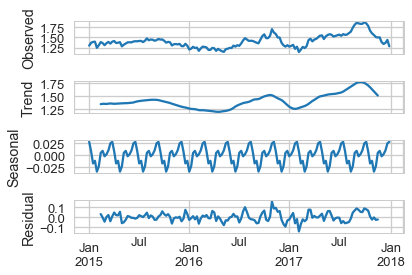

In [37]:
res = sm.tsa.seasonal_decompose(timeSeriesDetailed.Prices.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose1.png', dpi=200)

In [39]:
timeSeries = pd.read_csv('timeSeriesMonth.csv',
                             index_col=[0],
                             names=['Prices'],
                             parse_dates=True)
timeSeries.head()

,Prices
2015-01-01,1.365046
2015-02-01,1.326944
2015-03-01,1.361981
2015-04-01,1.383449
2015-05-01,1.344685


Text(0,0.5,'Price in Dollars')

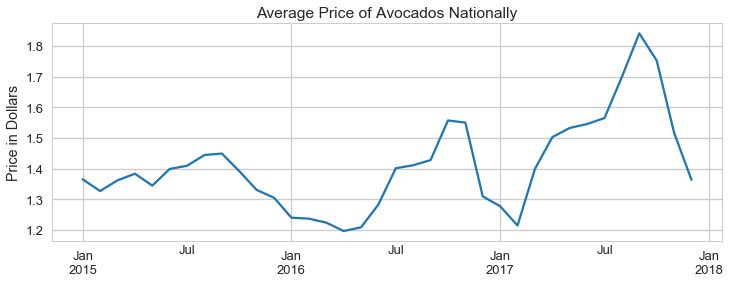

In [40]:
timeSeries.Prices.plot(figsize=(12,4))
plt.title('Average Price of Avocados Nationally')
plt.ylabel('Price in Dollars')

In [51]:
decompfreq = 12

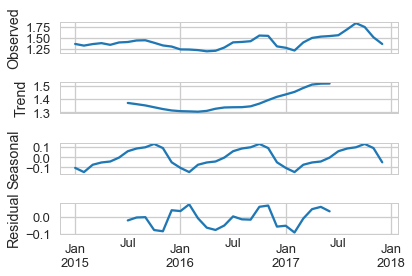

In [52]:
res = sm.tsa.seasonal_decompose(timeSeries.Prices.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

In [53]:
timeSeriesImports = pd.read_csv('MexicanFruitImports.csv',
                             index_col=[0],
                             names=['Imports'],
                             parse_dates=True)
timeSeriesImports.head()

,Imports
2015-01-01,424.663
2015-02-01,386.000
2015-03-01,451.898
2015-04-01,560.019
2015-05-01,610.835


Text(0,0.5,'Imports in Millions')

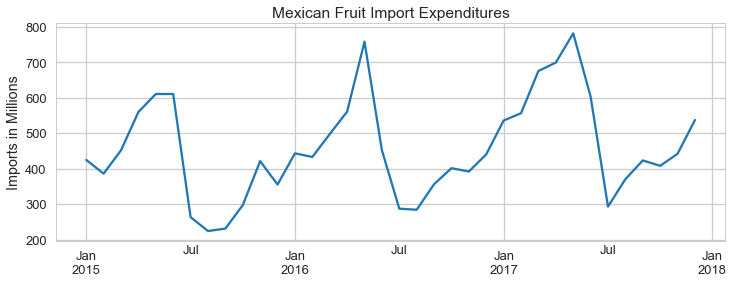

In [54]:
timeSeriesImports.Imports.plot(figsize=(12,4))
plt.title('Mexican Fruit Import Expenditures')
plt.ylabel('Imports in Millions')

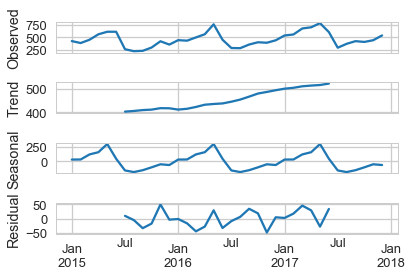

In [55]:
res = sm.tsa.seasonal_decompose(timeSeriesImports.Imports.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose3.png', dpi=200)

In [57]:
timeSeriesVolume = pd.read_csv('VolumeData.csv',
                             index_col=[0],
                             names=['California', 'Mexico', 'Chile', 'Dominican Republic', 'New Zealand', 'Peru'],
                             parse_dates=True)
timeSeriesVolume.head()

,California,Mexico,Chile,Dominican Republic,New Zealand,Peru
2015-01-04,164520,29719045,718677,740000,270000,0
2015-01-11,928302,50455653,811149,870000,0,0
2015-01-18,2169628,50940292,1025090,1090000,0,0
2015-01-25,4229894,38183291,481359,2260000,0,0
2015-02-01,3232783,29998307,853528,1350000,0,0


Text(0,0.5,'Imports in Pounds')

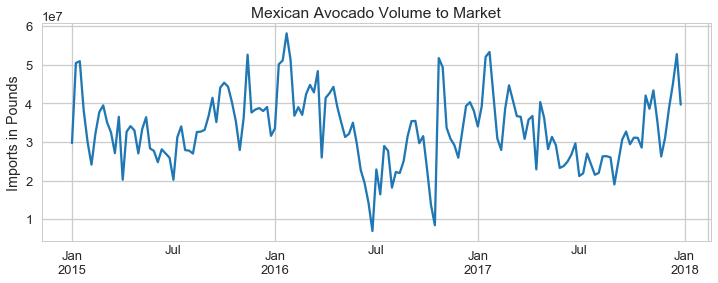

In [59]:
timeSeriesVolume.Mexico.plot(figsize=(12,4))
plt.title('Mexican Avocado Volume to Market')
plt.ylabel('Imports in Pounds')

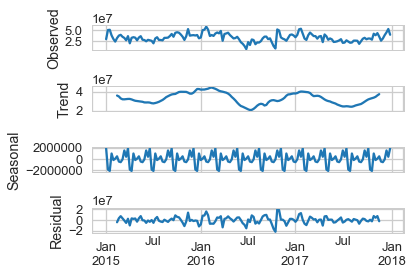

In [62]:
res = sm.tsa.seasonal_decompose(timeSeriesVolume.Mexico.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose4.png', dpi=200)